In [4]:
!pip install stopwordsiso
!pip install jieba
!pip install nlpia

     |████████████████████████████████| 73 kB 6.9 MB/s  eta 0:00:01


In [1]:
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from nlpia.data.loaders import get_data
import re
import nltk

/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/pugnlp/constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/pugnlp/tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/pugnlp/util.py:80: FutureWarning: The pandas.np m

In [2]:
import jieba
import numpy as np
import pandas as pd
import stopwordsiso
from stopwordsiso import stopwords
from bs4 import BeautifulSoup

In [3]:
#Read back in
file_name = "DOUBAN_dataset_group02"
post_df = pd.read_csv(file_name + ".tsv",sep = "\t", usecols = ["title","link","main text","reply text"])

In [4]:
post_df.iloc[3,0]

'我感觉自己被职场pua了'

In [41]:
post_df

,title,link,main text,reply text
0,论PUA我这件事，我的母亲当仁不让,https://www.douban.com/group/topic/235504708/,['论PUA我这件事，我的母亲当仁不让\n\n放假跟她一起总共待了两三天，我好不容易鼓起勇气...,"['幸好你够坚定。对于这样的父母就是物理隔离，少接触。精神隔离，他说什么你当听不见。', '..."
1,【求助】uu们我这算被pua了吧？,https://www.douban.com/group/topic/249024323/,['有个有钱亲戚大学时候资助过一些我的生活费，之前很多年都是没有联系的那种，就小时候有一次她...,[]
2,我即正义,https://www.douban.com/group/topic/216986445/,['做人简单粗暴点，就是必须主观，我觉得好的就是好的，我觉得对的就是对的。并且我愿意为我的想...,['个人想法要整合社会规则进去']
3,我感觉自己被职场pua了,https://www.douban.com/group/topic/235555163/,['首先我是做专利工作的，主要工作内容是将客户给的交底内容转化成法律文书方面的文件之后，再上...,['现在每次都很消极的改，上班也不想工作']
4,【安全出口】反PUA项目需要你！,https://www.douban.com/group/topic/234017958/,['7.9-7.11，独立创作者「润」会参加abC艺术书展，并在现场进行一些反pua的倡导。...,[]
5,别人是怎么控制我们的（三）,https://www.douban.com/group/topic/177681837/,"['别人控制我们基本就是三种方法：攻击贬低、许以好处、让你愧疚。 ', '说了两点了，今天说...","['就是知道对方肯定会犯错的地方进行公开处刑，摧毁对方意志，重新建立洗脑循环', '要你愧疚..."
6,求助：我是被PUA了吗T_T,https://www.douban.com/group/topic/223249645/,"['lz应届生，今年没考上研，于是开始找工作。', '有一个大lz近十岁的远房姐姐，在亲戚婚...",['换成是你，会不会这么对亲人。即便她是真的好心，也是人格有些问题，自身不健全，她的话也不值...
7,你们遇到过女的pua么,https://www.douban.com/group/topic/216966712/,['我在网上遇到了'],"['讲讲啊', 'Pua可不分男女', '我真是开了眼了，那个女的骚操作也是要我大开眼界',..."
8,1,https://www.douban.com/group/topic/218238947/,['1'],[]
9,反pua第一计,https://www.douban.com/group/topic/215005866/,"['那就是:坚持自己。', '一个人之所以会被pua最大的原因，就是对自己的不够自信，内心不...","['一定要内心强大', '一定要内心强大']"


### Make a Document(corpus) of every post ###

In [5]:
douban_all_text = []
for index in range(len(post_df)):
    #add title
    all_text = "" + str(post_df.iloc[index][0])
    #add main text
    for main in post_df.iloc[index][2]:
        all_text = all_text + str(main)
    for reply in post_df.iloc[index][3]:
        all_text = all_text + str(reply)
    douban_all_text.append(all_text)

In [6]:
np.shape(douban_all_text)

(17,)

## Make Chinese Tokeniser

In [7]:
# Code referenced & edited from NLP-Week2.1-Lecture

def Chinese_tokeniser(doc):
    #Split on spaces
    tokens_re = re.sub(r"[\[\],，:'\\n\s.\"“”…()（）\【\】\】]","",doc)
    tokens = jieba.lcut(tokens_re)
    processed = []
    for t in tokens:
        #Remove Chinese stop words
        if not t in stopwords("zh"):
            processed = processed + [t]
    #Return an array of tokens for that document
    return processed

## Bag of Words Top Tokens

In [23]:
#Code referenced & edited from NLP-Week2.1-Task

#Create count vectors
vectoriser = CountVectorizer(min_df=1, tokenizer = Chinese_tokeniser )
vectorised = vectoriser.fit_transform(douban_all_text)
print(vectorised.todense().shape)

(17, 1139)


In [25]:
#Code referenced & edited from NLP-Week2.1-Task

#Store in a dataframe and sort
num_words = 10
#Use the vocab as the column names
vocab_ = vectoriser.get_feature_names()
data_ = pd.DataFrame(vectorised.todense(), columns = vocab_)

token_present = pd.DataFrame(columns = ["doc","BoW_top_tokens"]) # code by myself

for i in range(len(vectorised.todense())):
    post_tokens = data_.iloc[i].sort_values(ascending = False).head(num_words)
    #rest code by myself
    post_tokens_list = []
    for every_token in post_tokens.index:
        post_tokens_list.append(str(every_token))
    token_present = token_present.append(pd.DataFrame([[str(i),post_tokens_list]] , columns = ["doc","BoW_top_tokens"]))

token_present

,doc,BoW_top_tokens
0,0,"[不会, 斤, 脸, 买, 衣服, 羞辱, 现在, 每天, 隔离, 愿意]"
0,1,"[吃, 骂, 属, 虎, 当时, 完全, 亲戚, 每次, 没有, 看到]"
0,2,"[觉得, 想法, 社会, 主观, 做人, 必须, 个人, 粗暴, 付出代价, 进去]"
0,3,"[改, 现在, 工作, 离职, 师傅, 已经, 内容, 专利, 独立, 撰写]"
0,4,"[反, 」, 「, pua, 出口, 安全, 润, 艺术, 项目, 问卷]"
0,5,"[愧疚, 控制, 地方, 洗脑, 知道, 摧毁, 公开, 攻击, 循环, 意志]"
0,6,"[工作, 听说, 投, 真的, 觉得, 公司, 找, 贬低, 一直, 爸爸]"
0,7,"[遇到, pua, 讲讲, 比较, 女, 真是, 过女, 眼, 大开眼界, 尺度]"
0,8,"[11, -, 添加, 父母, 爱, 焦虑, 炸, 激烈, 清醒, 深]"
0,9,"[pua, 内心, 不够, 一定, 强大, 其实, 重要, 是不是, 确定, 过度]"


## TF/IDF Top Tokens

In [8]:
#Code referenced & edited from NLP-Week2.1-Task

#Using the TFIDF Vectorizer to get TFIDF vectors with custom tokeniser
vectoriser = TfidfVectorizer(tokenizer=Chinese_tokeniser)
vectorised = vectoriser.fit_transform(douban_all_text)
print(vectorised.todense().shape)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/r1/zv_cgpdj61b8c60j_yk8lx900000gn/T/jieba.cache
Loading model cost 0.632 seconds.
Prefix dict has been built successfully.


(17, 1139)


In [9]:
#Code referenced & edited from NLP-Week2.1-Task

#Store in a dataframe and sort
num_words = 10
#Use the vocab as the column names
vocab_ = vectoriser.get_feature_names()
data_ = pd.DataFrame(vectorised.todense(), columns = vocab_)

token_present = pd.DataFrame(columns = ["doc","tf/idf_top_tokens"]) # code by myself

for i in range(len(vectorised.todense())):
    post_tokens = data_.iloc[i].sort_values(ascending = False).head(num_words)
    #rest code by myself
    post_tokens_list = []
    for every_token in post_tokens.index:
        post_tokens_list.append(str(every_token))
    token_present = token_present.append(pd.DataFrame([[str(i),post_tokens_list]] , columns = ["doc","tf/idf_top_tokens"]))

token_present

/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,doc,tf/idf_top_tokens
0,0,"[斤, 买, 脸, 衣服, 每天, 隔离, 不会, 羞辱, 愿意, 全毁]"
0,1,"[吃, 当时, 虎, 属, 骂, 完全, 看到, 亲戚, 没有, 意思]"
0,2,"[想法, 觉得, 正义, 做人, 规则, 整合, 粗暴, 付出代价, 主观, 进去]"
0,3,"[改, 离职, 师傅, 已经, 3, 专利, 写, 撰写, 案子, 工作]"
0,4,"[出口, 安全, 」, 「, 反, 艺术, 问卷, 润, pua, 项目]"
0,5,"[愧疚, 控制, 地方, 建立, 爸, 处刑, 肯定, 意志, 循环, 攻击]"
0,6,"[听说, 工作, 投, 觉得, 真的, 公司, 贬低, 找, 爸爸, 一直]"
0,7,"[遇到, 讲讲, 网上, 男女, 女, 现实, 真是, 过女, 眼, 大开眼界]"
0,8,"[11, -, 添加, 父母, 爱, 焦虑, 炸, 激烈, 清醒, 深]"
0,9,"[内心, 强大, pua, 不够, 一定, 第一, 不了, 自责, 自省, 拥有]"


## LSA

In [10]:
#Code referenced & edited from NLP-Week2.2-Lecture

tfidf_vectoriser = TfidfVectorizer(tokenizer=Chinese_tokeniser)
tfidf_docs = tfidf_vectoriser.fit_transform(raw_documents=douban_all_text).toarray()

In [11]:
#Code referenced & edited from NLP-Week2.2-Lecture

column_nums, terms = zip(*sorted(zip(tfidf_vectoriser.vocabulary_.values(), tfidf_vectoriser.vocabulary_.keys()))) # Get the column_numbers for each term in our vocabulary
tfidf_docs_df = pd.DataFrame(tfidf_docs, columns=terms)
#tfidf_docs_df #show it

In [12]:
topic_num_lsa = 10

#Code referenced & edited from NLP-Week2.2-Lecture

tfidf_docs_df = tfidf_docs_df - tfidf_docs_df.mean() #Centres vectorized documents by subtracting the mean
svd = TruncatedSVD(n_components = topic_num_lsa, n_iter = 100) 
svd_topic_vectors = svd.fit_transform(tfidf_docs_df.values)
svd_topic_vectors_df = pd.DataFrame(svd_topic_vectors, columns=['topic{}'.format(i) for i in range(topic_num_lsa)])
#svd_topic_vectors_df

In [13]:
topic_weights = pd.DataFrame(svd.components_.T, index=terms, columns=['topic{}'.format(i) for i in range(topic_num_lsa)])
#topic_weights #display it

In [14]:
topic_present = pd.DataFrame(columns = ["","LSA " + str(topic_num_lsa)+" topics"]) # code by myself

#Do this for all topics
for i in range(topic_num_lsa):
    topicName = "topic" + str(i)
    LDA_topics = topic_weights.get(topicName).sort_values(ascending=False)[:10]
    #rest code by myself
    LDA_topics_list = []
    for every_topic in LDA_topics.index:
        LDA_topics_list.append(str(every_topic))
    topic_present = topic_present.append(pd.DataFrame([[str(i),LDA_topics_list]] , columns = ["","LSA " + str(topic_num_lsa)+" topics"]))

topic_present

,,LSA 10 topics
0,0,"[pua, 遇到, 内心, 讲讲, 压抑, 言语, 具体情况, 难过, 态度, 职场]"
0,1,"[图, 11, 无处不在, 自由, 似乎, 说些, 消息, 第一条, 发言, 控制]"
0,2,"[图, 11, 遇到, 讲讲, 管理, 向上, 具体情况, 言语, 压抑, 想法]"
0,3,"[控制, 愧疚, 遇到, 似乎, 说些, 第一条, 消息, 自由, 发言, 比较]"
0,4,"[想法, 觉得, 简单, 遇到, 发言, 消息, 似乎, 说些, 自由, 第一条]"
0,5,"[图, 」, 「, 出口, 安全, 管理, 向上, 反, 完全, 进行]"
0,6,"[向上, 管理, 完全, 吃, 盛传, 我司, 讲究, 集美, 内会, rt]"
0,7,"[yamy, 认为, 生活, ·, 丑, 时尚, 故事, 改, 挣, 每个]"
0,8,"[愧疚, 脸, 买, 斤, 衣服, 羞辱, 愿意, 隔离, 每天, 认为]"
0,9,"[向上, 管理, 脸, 买, 衣服, 斤, 无法, 不会, 无处不在, 每天]"


## LDA

In [54]:
topic_num_lda = 12

#Code referenced & edited from NLP-Week2.2-Lecture

# Set things up
lda_cv = CountVectorizer(tokenizer=Chinese_tokeniser,
                        max_df=.1,
                        max_features=5000)
count_data = lda_cv.fit_transform(douban_all_text)
lda = LatentDirichletAllocation(n_components=topic_num_lda,
                                random_state=123,
                                learning_method='batch')

In [55]:
#Code referenced & edited from NLP-Week2.2-Lecture

# And run LDA. This could take a loooonggggg time....
lda_topics = lda.fit_transform(count_data)

In [56]:
#Now make a friendly data frame from the topics and display it
lda_topic_vectors_df = pd.DataFrame(lda_topics, columns=['topic{}'.format(i) for i in range(topic_num_lda)])
#lda_topic_vectors_df

In [57]:
topic_present = pd.DataFrame(columns = ["","LDA " + str(topic_num_lda)+" topics"]) # code by myself

#Code referenced & edited from NLP-Week2.2-Lecture
#Do this for all topics
n_top_words = 10
feature_names = lda_cv.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    LSA_topics = [feature_names[i_]
                    for i_ in topic.argsort()\
                        [:-n_top_words - 1:-1]]
    #rest code by myself
    topic_present = topic_present.append(pd.DataFrame([[str(topic_idx),LSA_topics]] , columns = ["","LDA " + str(topic_num_lda)+" topics"]))

topic_present

/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,LDA 12 topics
0,0,"[管理, 向上, 想法, 讲究, 我司, 盛传, 集美, 内会, rt, 做人]"
0,1,"[11, 图, 自由, 消息, 似乎, 说些, 第一条, 发言, 具体情况, 言语]"
0,2,"[故意, 产品, 女孩, 确认, 华润, 注意, 诈骗, qq, 金融, 页面]"
0,3,"[具体情况, 言语, 压抑, 11, 图, 自由, 消息, 似乎, 说些, 第一条]"
0,4,"[脸, 衣服, 斤, 买, 内心, 隔离, 每天, 焦虑, 痘痘, 思想]"
0,5,"[愧疚, 建立, 洗脑, 意志, 循环, 肯定, 爸, 处刑, 摧毁, 攻击]"
0,6,"[改, 师傅, 离职, 3, 撰写, 案子, 写, 专利, 宁波, 员工]"
0,7,"[11, 图, 自由, 消息, 似乎, 说些, 第一条, 发言, 具体情况, 言语]"
0,8,"[11, 图, 自由, 消息, 似乎, 说些, 第一条, 发言, 具体情况, 言语]"
0,9,"[吃, 听说, 投, 虎, 当时, 属, 从来, 老家, 值得, 大城市]"


## t-SNE within Word Embeddings

In [51]:
#Run this every time you run the notebook (if working on your own computer)
embeddings_file = "sgns.weibo.word.bz2"
#This line will load the 200,000 most common words into wv, a variable of word vectors
#Note that this will load these into memory, so if you don't have a lot of memory on your computer you may run into problems/slowness
wv = KeyedVectors.load_word2vec_format(embeddings_file, binary=False, limit=200000)

In [93]:
import nltk
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import codecs
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.pyplot as plt

In [94]:
font_path = "/Users/randgrant/Downloads/SourceHanSansCN-Normal.otf"
prop = fm.FontProperties(fname = font_path)

In [95]:
# Modified for existing Chinese Word Embeddings

# From https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot_modified(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in wv_model:
        if word in wv.index_to_key:
            tokens.append(wv[word])
            labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontproperties=prop,
                     size=14)
    plt.show()

In [102]:
wv_model = []

for index in range(len(topic_present)):
    for word in topic_present.iloc[index][1]:
        if word not in wv_model:
            wv_model.append(word)

/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


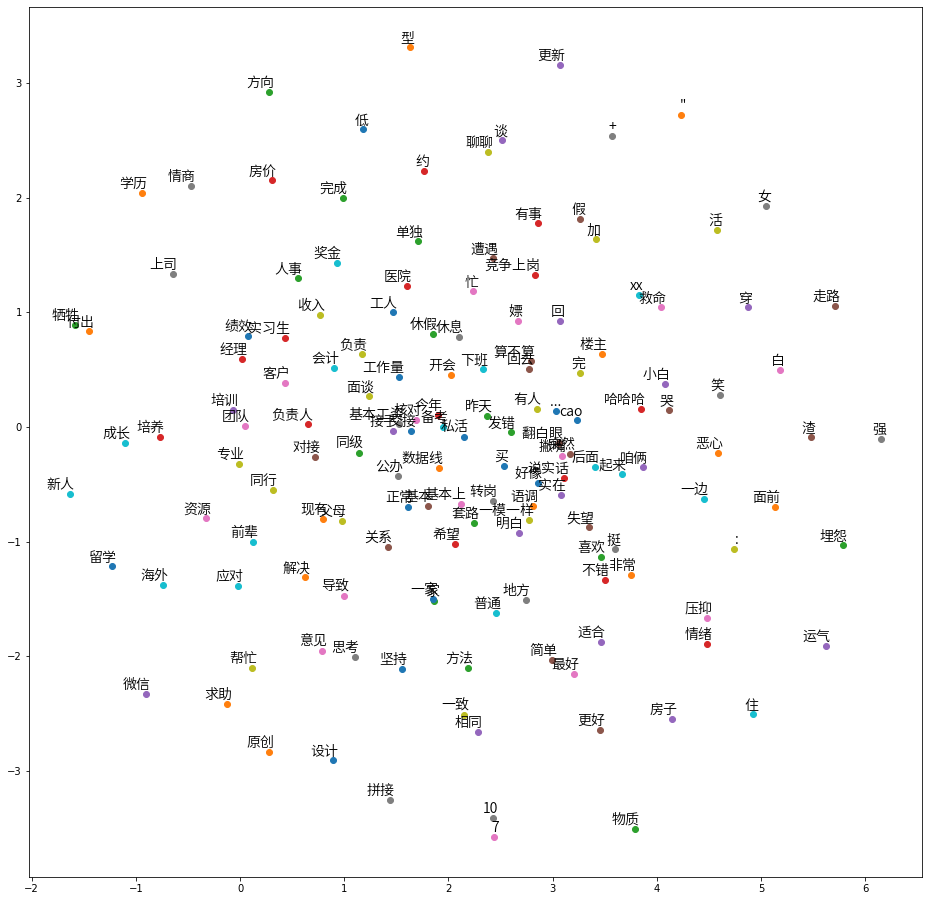

In [103]:
tsne_plot_modified(wv_model)

## Unused Code

In [155]:
#Code referenced & edited from NLP-Week2.2-Lecture

#Create count vectors
cv = CountVectorizer(min_df=1, tokenizer=Chinese_tokeniser)
count_array = cv.fit_transform(douban_all_text).toarray()

#create tfidf vectors from count vectors
transformer = TfidfTransformer()
transformer.fit(count_array)
tfidfs = transformer.transform(count_array)

#store our tfidfs in a pandas dataframe
vocab = cv.get_feature_names()
data = pd.DataFrame(tfidfs.todense(), columns = vocab) #store it in a nice data frame to make it easy to work with

#data

/Users/randgrant/opt/anaconda3/envs/nlpminiproject/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [156]:
data

,\n,,"""",',(,),+,",",-,.,...,💢,😂,😅,😔,😪,😭,😶,🙄,🙋,🤢
0,0.000000,0.034094,0.000000,0.033012,0.000000,0.000000,0.055053,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.380326,0.000000,0.113308,0.000000,0.000000,0.000000,0.064481,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105967
2,0.000000,0.052272,0.000000,0.101226,0.000000,0.000000,0.000000,0.043204,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.134888,0.000000,0.261210,0.000000,0.000000,0.000000,0.099099,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.086823,0.000000,0.168133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.120502,0.000000,0.233353,0.000000,0.000000,0.000000,0.106236,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.104423,0.000000,0.252769,0.000000,0.000000,0.000000,0.115076,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094557,0.000000,0.000000,0.000000
7,0.000000,0.117850,0.000000,0.076073,0.000000,0.000000,0.000000,0.000000,0.000000,0.081071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.063630,0.000000,0.184828,0.000000,0.000000,0.000000,0.070121,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.524157,0.000000,0.075187,0.062695,0.062695,0.000000,0.021394,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [157]:
#Code referenced & edited from NLP-Week2.2-Lecture

num_words = 10
for i in range(len(tfidfs.todense())):
    print("doc", i)
    print(data.iloc[i].sort_values(ascending = False).head(num_words))

doc 0
n     0.574952
\     0.544095
一毛    0.165160
主动    0.139865
”     0.130837
“     0.130837
女     0.110107
套路    0.110107
关系    0.100610
最后    0.093244
Name: 0, dtype: float64
doc 1
同级     0.529835
       0.380326
同事     0.264722
哈哈哈    0.258996
遭遇     0.211934
相同     0.188963
pua    0.161202
经历     0.149693
'      0.113308
槽      0.105967
Name: 1, dtype: float64
doc 2
干     0.346304
工作    0.307501
觉得    0.189195
会计    0.168813
同事    0.165545
领导    0.156254
工资    0.148963
忙     0.142001
一直    0.134845
应该    0.125929
Name: 2, dtype: float64
doc 3
'       0.261210
不想      0.194755
傲慢      0.162858
自以为是    0.162858
任何人     0.162858
扯淡      0.162858
只想      0.162858
豆油      0.162858
明       0.162858
言语      0.162858
Name: 3, dtype: float64
doc 4
返      0.314480
话题     0.314480
记      0.314480
创建     0.314480
启迪     0.314480
组长     0.280393
记录     0.280393
成功     0.256209
哈哈哈    0.256209
需要     0.222123
Name: 4, dtype: float64
doc 5
半年    0.233496
'     0.233353
领导    0.216124
不错    0.1

In [ ]:
##More helpful to print top 10 words for each document (i.e., words with top tfidf values)
#num_words = 10
#print(data.iloc[i].sort_values(ascending = False).head(num_words))